In [422]:
import pandas as pd  # type: ignore
import numpy as np   # type: ignore
import matplotlib.pyplot as plt   # type: ignore
import seaborn as sns   # type: ignore
from sklearn.model_selection import train_test_split   # type: ignore
from sklearn.linear_model import LinearRegression   # type: ignore
from sklearn.metrics import mean_squared_error  # type: ignore
from sklearn.preprocessing import StandardScaler  # type: ignore
from sklearn.preprocessing import PolynomialFeatures  # type: ignore
import re  # type: ignore

In [423]:
data = pd.read_csv('data.csv')
data.drop_duplicates(inplace=True)
data.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [424]:
data.shape

(450, 16)

<Axes: >

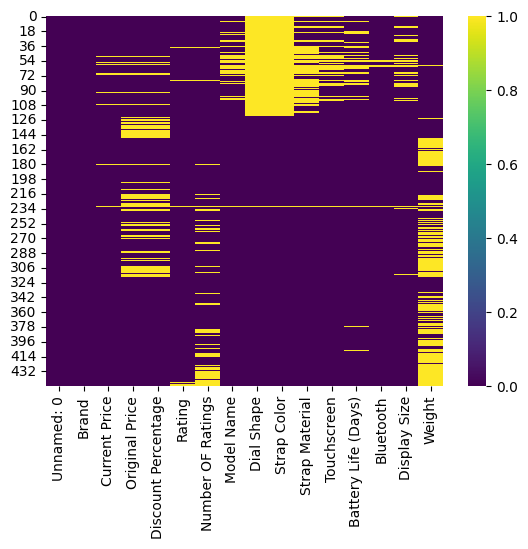

In [425]:
sns.heatmap(data.isnull(),cbar=True,cmap='viridis') 

In [426]:
# filtring the  data to  categorical and numerical data
categorical_data = [ feature for feature in data.columns if data[feature].dtypes == 'object']
numerical_data = [ feature for feature in data.columns if data[feature].dtypes != 'object']


In [427]:
data[numerical_data].describe() # we should  nbotice here that the Discount Percentage that's  means that  the  original price had increased instead of  decreasing 

,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,450.000000,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,224.500000,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,130.048068,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,0.000000,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,112.250000,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,224.500000,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,336.750000,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,449.000000,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


In [428]:
data[numerical_data].corr()

,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
Unnamed: 0,1.000000,-0.082605,-0.079370,-0.092257,-0.263381,-0.130883,0.353799
Current Price,-0.082605,1.000000,0.970261,-0.627595,0.394447,-0.142049,0.025192
Original Price,-0.079370,0.970261,1.000000,-0.508600,0.332426,-0.136846,-0.122888
Discount Percentage,-0.092257,-0.627595,-0.508600,1.000000,-0.217765,0.204600,-0.008986
Rating,-0.263381,0.394447,0.332426,-0.217765,1.000000,0.054922,-0.090472
Number OF Ratings,-0.130883,-0.142049,-0.136846,0.204600,0.054922,1.000000,0.046864
Battery Life (Days),0.353799,0.025192,-0.122888,-0.008986,-0.090472,0.046864,1.000000


In [429]:
data[numerical_data].skew()

Unnamed: 0              0.000000
Current Price           2.724376
Original Price          2.668311
Discount Percentage    -0.944123
Rating                 -1.570849
Number OF Ratings      10.220186
Battery Life (Days)    -0.183545
dtype: float64

### Data Visualising


In [430]:
numerical_data

['Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [431]:
numerical_data.remove('Unnamed: 0')
# we gonna have 6 plots for the numerical data

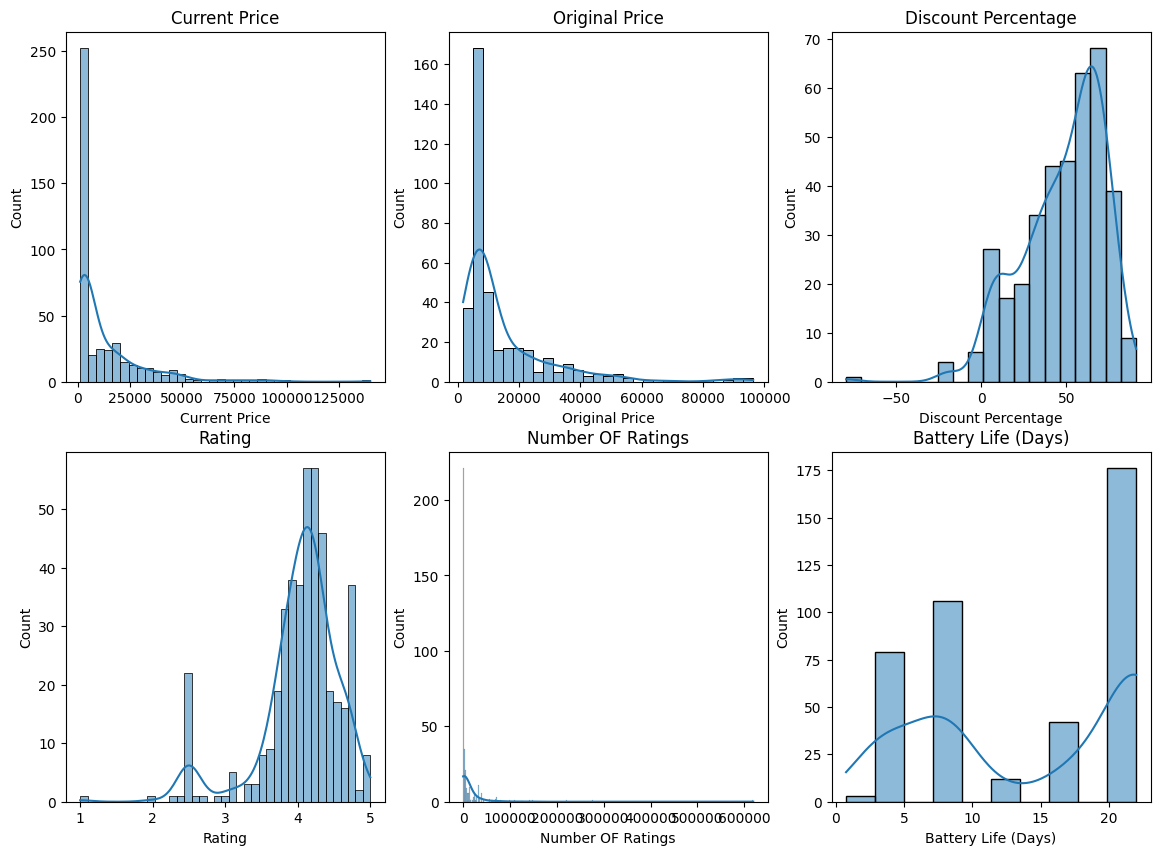

In [432]:
# Create a figure with a grid of 2 rows and 3 columns of subplots
# figsize=(14, 10) sets the size of the figure
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    # Calculate the row and column indices for the current subplot
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)

    # Select the current subplot based on the row and column indices
    ax = axes[row, col]

    # Plot the histogram for the current column with a KDE overlay
    # ax is the current subplot to draw on
    sns.histplot(data[column], ax=ax, kde=True)

    ax.set_title(column)

plt.show()


## we can see that the data is not normally distributed so we need to apply some transformation to make it normally distributed

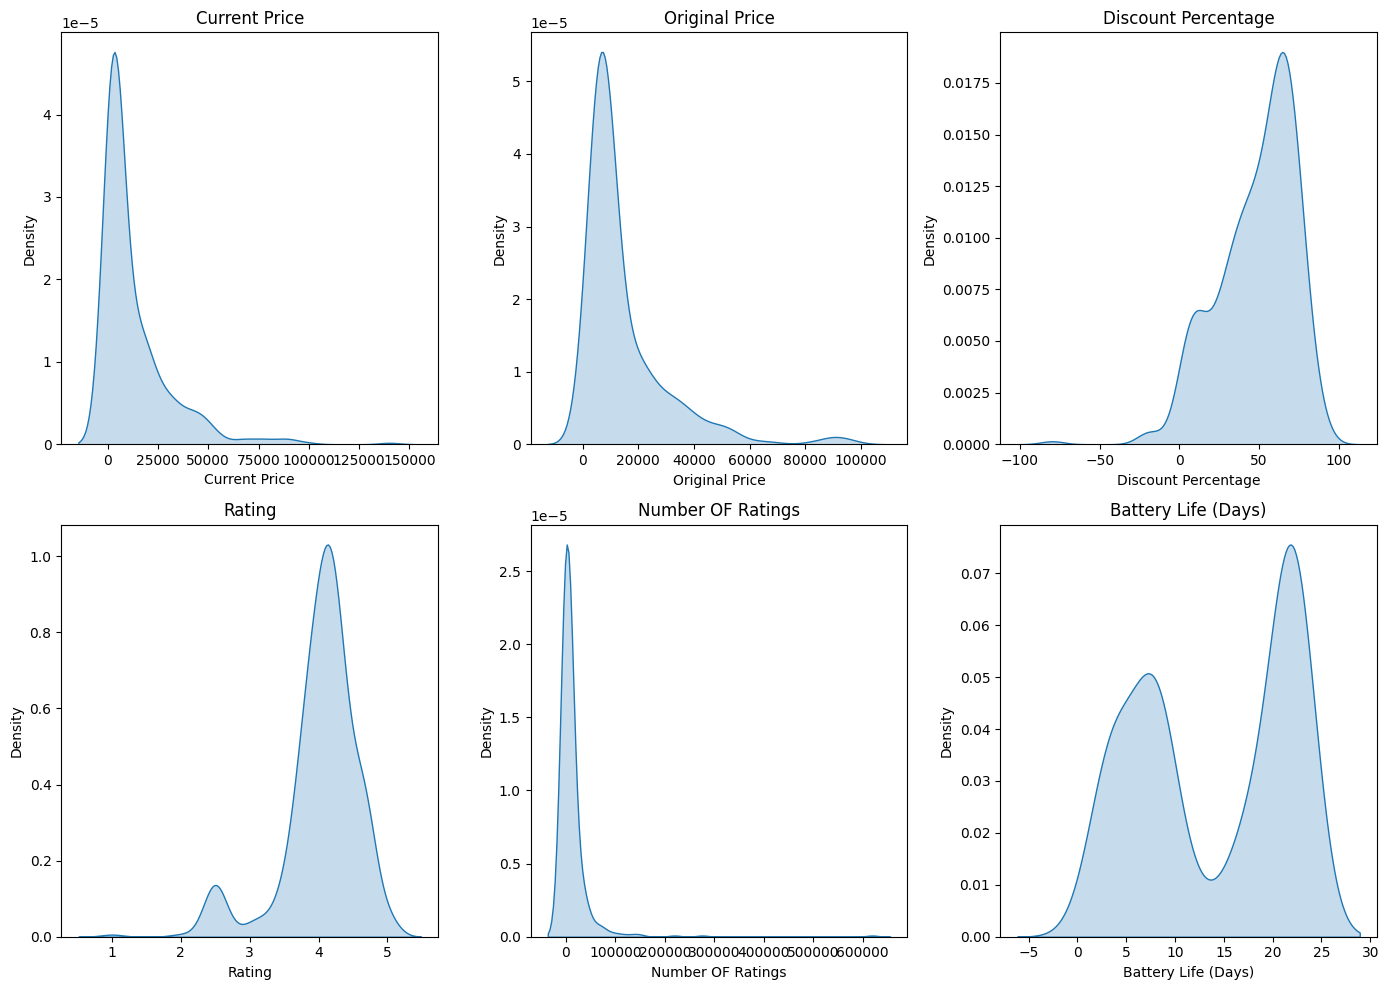

In [433]:
# density plot
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
for i, column in enumerate(numerical_data):
          row = i // 3
          col = i % 3
          ax = axes[row, col]
          sns.kdeplot(data[column], ax=ax, fill=True)
          ax.set_title(column)
plt.tight_layout()

# Use plt.tight_layout() to adjust spacing for a cleaner look.
# Use plt.show() to display the figure on the screen.


<Axes: >

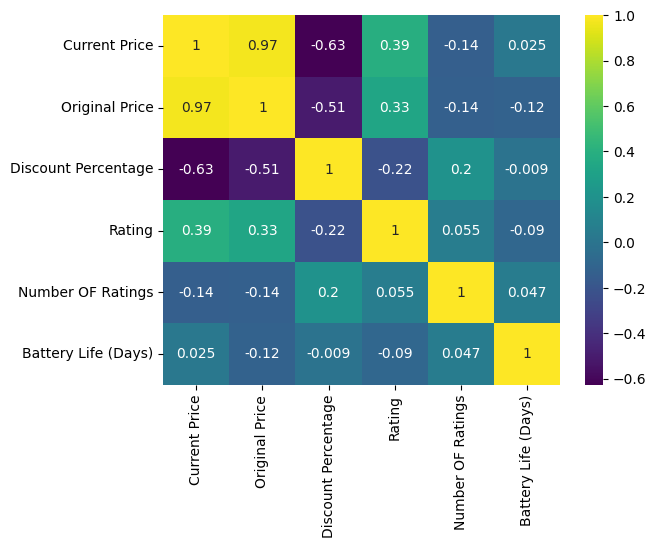

In [434]:
sns.heatmap(data[numerical_data].corr(),annot=True,cmap='viridis')

### Data cleaning

In [435]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [436]:
data['Display Size'].isnull().sum() #to  see the number of missing values in the Display Size column

30

In [437]:
data['Display Size'].value_counts() # we can see all the  values and  the count of each value (the number of times it appears in the data)
data['Display Size'].value_counts().count() # we can see the number of unique values in the data
data['Display Size'].fillna('0.0 inches',inplace=True) # to  replace all the null values with 0.0 inches


C:\Users\DELL\AppData\Local\Temp\ipykernel_22628\4113777469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Display Size'].fillna('0.0 inches',inplace=True) # to  replace all the null values with 0.0 inches


In [438]:
data['Display Size'] = data['Display Size'].apply(lambda x: x.split(' ')[0]).astype(float) # to  extract the numerical part of the string and convert it to a float   , the  x is  the  record of the column 
data['Display Size'].replace(0.0,data['Display Size'].mean(),inplace=True) # to  replace the 0.0 inches with the mean of the column    

C:\Users\DELL\AppData\Local\Temp\ipykernel_22628\3200677290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Display Size'].replace(0.0,data['Display Size'].mean(),inplace=True) # to  replace the 0.0 inches with the mean of the column


In [439]:
data['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [440]:
# we should replace the  weight with the mean of the column or the same value of the  record 
mean = sum([int(x) for x in re.findall(r'\d+' , '20 - 35 g') ]) / 2
data['Weight'] = data['Weight'].replace('20 - 35 g',mean)


mean = sum([int(x) for x in re.findall(r'\d+' , '50 - 75 g') ]) / 2
data['Weight'] = data['Weight'].replace('50 - 75 g',mean)

mean = sum([int(x) for x in re.findall(r'\d+' , '35 - 50 g') ]) / 2
data['Weight'] = data['Weight'].replace('35 - 50 g',mean)

mean = int(re.findall(r'\d+' , '75g +')[0])
data['Weight'] = data['Weight'].replace('75g +',mean)

mean = int(re.findall(r'\d+' , '<= 20 g')[0])
data['Weight'] = data['Weight'].replace('<= 20 g', mean).infer_objects(copy=False)

data['Weight'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22628\3350199181.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Weight'] = data['Weight'].replace('<= 20 g', mean).infer_objects(copy=False)


Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [441]:
# add a column of  the  discount price instead of  the  discount percentage
data['Discount Price'] = (data['Original Price'] * data['Discount Percentage']) / 100 
data.drop('Discount Percentage',axis=1,inplace=True)
data['Discount Price'] 

0       6910.000000
1      13200.000001
2       5991.000000
3      18200.000000
4       3400.000000
           ...     
445     3000.000000
446     6299.000000
447     3000.000000
448     4799.000000
449     4999.000000
Name: Discount Price, Length: 450, dtype: float64

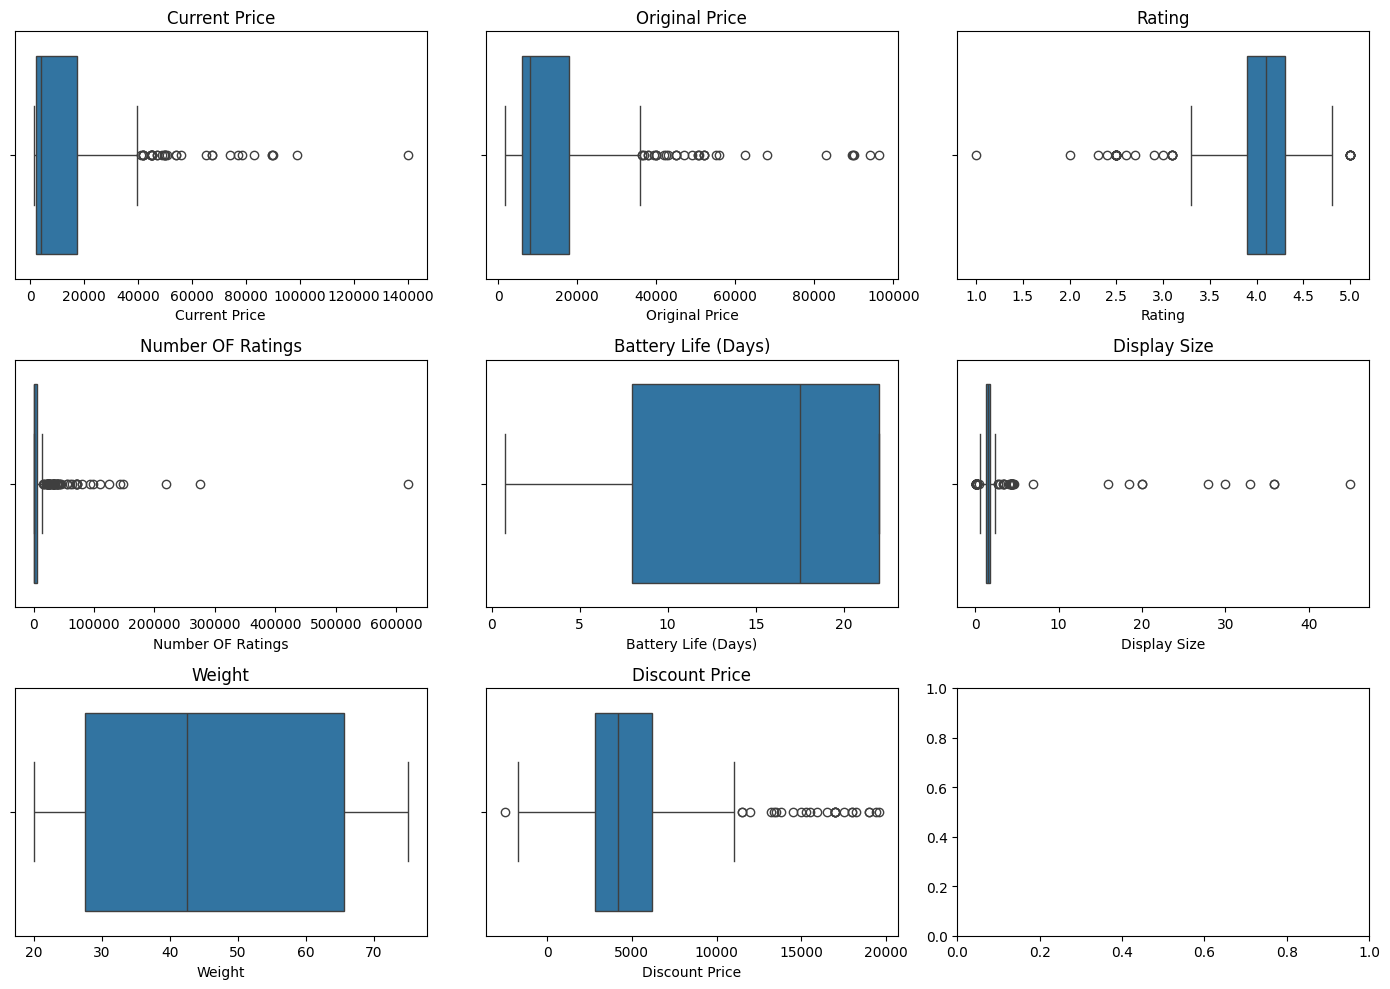

In [442]:
numerical_data = [ feature for feature in data.columns if data[feature].dtypes != 'object']
fig , axes = plt.subplots(3,3,figsize=(14,10))
for i , column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    sns.boxplot(x = data[column],ax=ax)
    ax.set_title(column)
plt.tight_layout()

# we can notice that the data has some outliers(des valeurs aberrantes / annomalies) so we need to hundle them ( the bubbles in the boxplot)

In [443]:
def removve_outliers_IQR(data, column):  #écart interquartile / interquartile range
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    # print(data.shape)
    return data
# we can use the function to hundle the outliers from the data / it will return the data without the outliers the  values are bigger than the upper bound or smaller than the lower bound

In [444]:
concerned_columns = ['Original Price', 'Discount Price', 'Display Size', 'Current Price' , 'Rating','Number OF Ratings' ]    
data[concerned_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Original Price     377 non-null    float64
 1   Discount Price     377 non-null    float64
 2   Display Size       450 non-null    float64
 3   Current Price      440 non-null    float64
 4   Rating             444 non-null    float64
 5   Number OF Ratings  391 non-null    float64
dtypes: float64(6)
memory usage: 21.2 KB


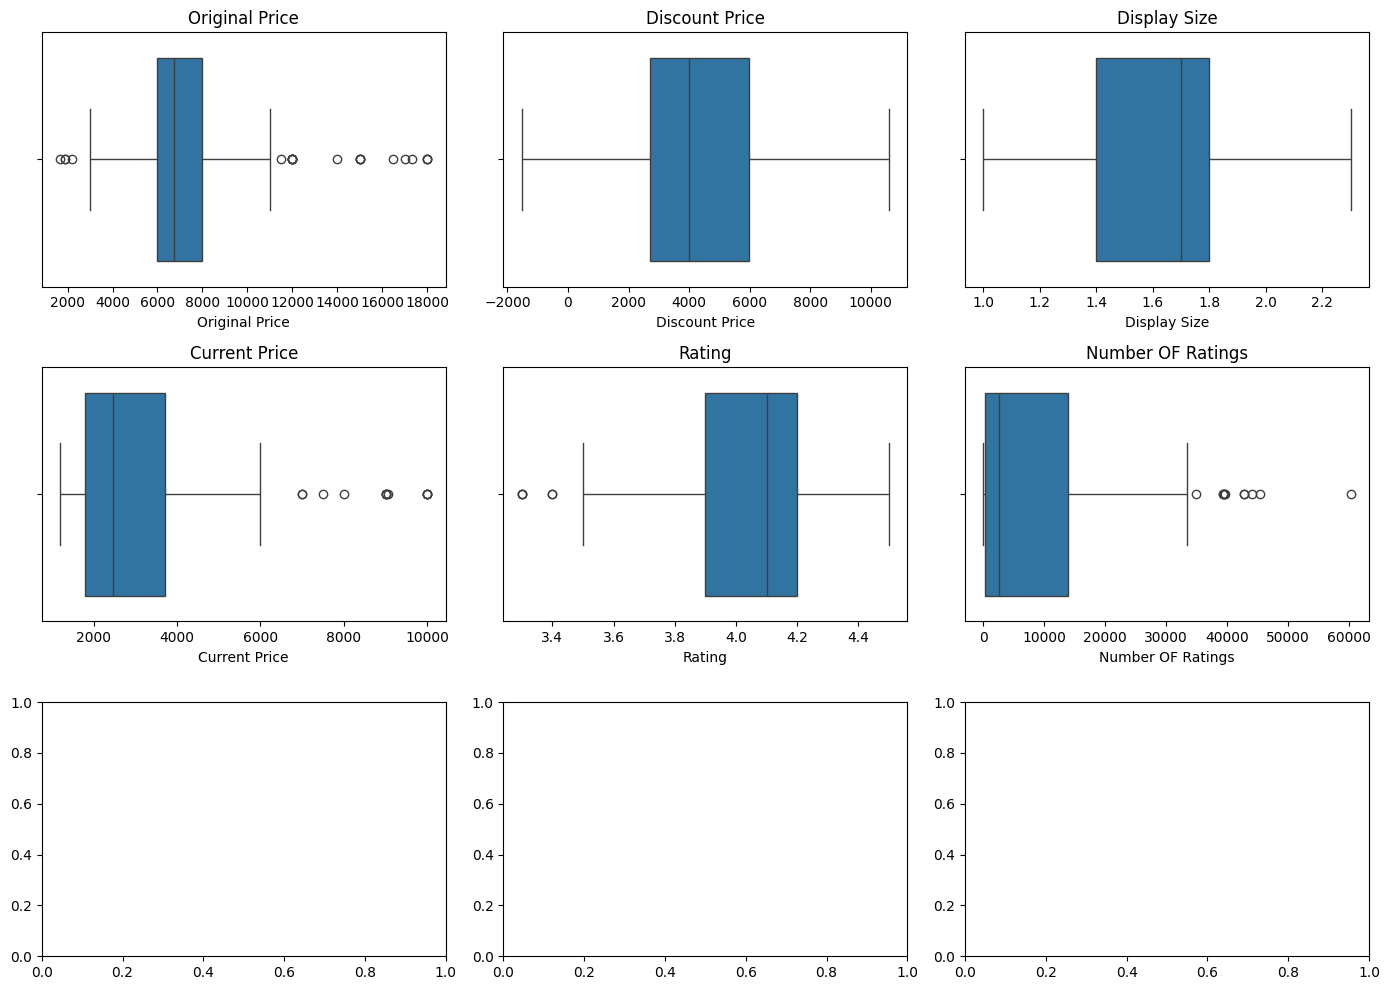

In [445]:
for column in concerned_columns:
    data = removve_outliers_IQR(data, column)

fig , axes = plt.subplots(3,3,figsize=(14,10)) # 3 rows and 3 columns
for i , column in enumerate(concerned_columns):
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    sns.boxplot(x = data[column],ax=ax)
    ax.set_title(column)
plt.tight_layout()


In [446]:
for column in numerical_data:
          data[column] = data[column].fillna(data[column].median()).infer_objects(copy=False)
          # to  replace the  null values with the median of the other num  columns 

In [447]:
data[numerical_data].info()


<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 2 to 442
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        166 non-null    float64
 1   Original Price       166 non-null    float64
 2   Rating               166 non-null    float64
 3   Number OF Ratings    166 non-null    float64
 4   Battery Life (Days)  166 non-null    float64
 5   Display Size         166 non-null    float64
 6   Weight               166 non-null    float64
 7   Discount Price       166 non-null    float64
dtypes: float64(8)
memory usage: 11.7 KB


### Normalize the Data 

In [448]:
from sklearn.preprocessing import MinMaxScaler 
scalar = MinMaxScaler() # the  formula is (x - min) / (max - min)  to  scale the data
num_data = pd.DataFrame(scalar.fit_transform(data[numerical_data[:-1]]), columns=numerical_data[:-1])  # to scale the data 



In [449]:
num_data.head()



,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.090909,0.387079,0.416667,0.360292,0.341176,0.538462,0.409091
1,0.045455,0.203919,0.666667,0.230536,0.341176,0.538462,0.409091
2,0.034091,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091
3,0.090909,0.203919,0.666667,0.016852,0.552941,0.307692,0.409091
4,0.068182,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091


In [450]:
data.drop(numerical_data[:-1],axis=1,inplace=True) # to drop the numerical data from the data
data.reset_index(inplace=True) # `to reset the index of the data to  get the  same index of the  num_data 
data = pd.concat([data,num_data],axis=1) # to  add the scaled data to the data


In [451]:
data.head()

,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,5991.0,0.090909,0.387079,0.416667,0.360292,0.341176,0.538462,0.409091
1,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,3400.0,0.045455,0.203919,0.666667,0.230536,0.341176,0.538462,0.409091
2,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,2500.0,0.034091,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091
3,6,noise,NaN,NaN,NaN,NaN,NaN,Yes,3000.0,0.090909,0.203919,0.666667,0.016852,0.552941,0.307692,0.409091
4,7,noise,wrb-sw-colorfitgrand-std-rpnk_rpnk,NaN,NaN,Other,Yes,Yes,2200.0,0.068182,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091


### Categorical Data

In [452]:
  # to  add the index to the data
# data.head()
data.drop('index',axis=1,inplace=True) # to drop the index column
data.isna().sum()


Brand                   0
Model Name             13
Dial Shape             73
Strap Color            73
Strap Material         34
Touchscreen            13
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [453]:
categorical_data = [feature for feature in data.columns if data[feature].dtypes == 'object']

categorical_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [454]:

data.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,5991.0,0.090909,0.387079,0.416667,0.360292,0.341176,0.538462,0.409091
1,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,3400.0,0.045455,0.203919,0.666667,0.230536,0.341176,0.538462,0.409091
2,noise,NSW-05,NaN,NaN,Other,Yes,Yes,2500.0,0.034091,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091
3,noise,NaN,NaN,NaN,NaN,NaN,Yes,3000.0,0.090909,0.203919,0.666667,0.016852,0.552941,0.307692,0.409091
4,noise,wrb-sw-colorfitgrand-std-rpnk_rpnk,NaN,NaN,Other,Yes,Yes,2200.0,0.068182,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091


In [455]:
data[categorical_data].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
1,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
2,noise,NSW-05,NaN,NaN,Other,Yes,Yes
3,noise,NaN,NaN,NaN,NaN,NaN,Yes
4,noise,wrb-sw-colorfitgrand-std-rpnk_rpnk,NaN,NaN,Other,Yes,Yes


In [456]:
data['Brand'].value_counts()

Brand
noise         34
boat          24
dizo          21
fire-boltt    19
pebble        13
gizmore       11
ambrane       11
zebronics      9
amazfit        8
honor          7
crossbeats     4
fossil         3
hammer         1
huawei         1
Name: count, dtype: int64

In [457]:
for column in categorical_data:
    data[column] = data[column].fillna('other').infer_objects(copy=False)

data = pd.concat([data.drop('Brand', axis=1), pd.get_dummies(data['Brand'], drop_first=True).astype(int)], axis=1)
data = pd.concat([data.drop('Model Name', axis=1), pd.get_dummies(data['Model Name'], drop_first=True).astype(int).drop(['other'], axis=1)], axis=1)
data = pd.concat([data.drop('Dial Shape', axis=1), pd.get_dummies(data['Dial Shape'], drop_first=True).astype(int).drop(['other'], axis=1)], axis=1)
data = pd.concat([data.drop('Strap Color', axis=1), pd.get_dummies(data['Strap Color'], drop_first=True).astype(int).drop(['other'], axis=1)], axis=1)
data = pd.concat([data.drop('Strap Material', axis=1), pd.get_dummies(data['Strap Material'], drop_first=True).astype(int).drop(['other'], axis=1)], axis=1)

data = pd.concat([data.drop('Touchscreen', axis=1), pd.get_dummies(data['Touchscreen'], drop_first=True).astype(int).drop(['other'], axis=1)], axis=1)

data.drop('Bluetooth',axis=1,inplace=True)



In [458]:
data.head()

,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,ambrane,boat,...,Leather,Metal,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene,Yes
0,5991.0,0.090909,0.387079,0.416667,0.360292,0.341176,0.538462,0.409091,0,1,...,0,0,0,0,0,1,0,0,0,1
1,3400.0,0.045455,0.203919,0.666667,0.230536,0.341176,0.538462,0.409091,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2500.0,0.034091,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3000.0,0.090909,0.203919,0.666667,0.016852,0.552941,0.307692,0.409091,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2200.0,0.068182,0.142682,0.583333,0.542412,0.341176,0.538462,0.409091,0,0,...,0,0,1,0,0,0,0,0,0,1


In [459]:
data.isna().sum()

Discount Price                 0
Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
                              ..
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Yes                            0
Length: 188, dtype: int64

In [460]:
data.to_csv('cleaned_data.csv',index=False)